In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('telecom_churn(in).csv')

# Display basic information about the dataset
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


In [10]:
# Separate numerical and categorical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Handling missing values
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())
for col in categorical_features:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Encoding categorical features
df = pd.get_dummies(df, drop_first=True)

# Check if cleaning is successful
df.head()


,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,telecom_partner_BSNL,...,date_of_registration_9/6/2022,date_of_registration_9/7/2020,date_of_registration_9/7/2021,date_of_registration_9/7/2022,date_of_registration_9/8/2020,date_of_registration_9/8/2021,date_of_registration_9/8/2022,date_of_registration_9/9/2020,date_of_registration_9/9/2021,date_of_registration_9/9/2022
0,1,25,755597,4,124962,44,45,-361,0,False,...,False,False,False,False,False,False,False,False,False,False
1,2,55,125926,2,130556,62,39,5973,0,False,...,False,False,False,False,False,False,False,False,False,False
2,3,57,423976,0,148828,49,24,193,1,False,...,False,False,False,False,False,False,False,False,False,False
3,4,46,522841,1,38722,80,25,9377,1,True,...,False,False,False,False,False,False,False,False,False,False
4,5,26,740247,2,55098,78,15,1393,0,True,...,False,False,False,False,False,False,False,False,False,False


In [11]:
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df.drop('churn', axis=1)  # Replace 'churn' with the actual churn column name
y = df['churn']  # Replace 'churn' with the actual churn column name

# Scaling numerical features
scaler = StandardScaler()
numerical_features = [col for col in numerical_features if col in X.columns]
X[numerical_features] = scaler.fit_transform(X[numerical_features])


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [14]:
from sklearn.metrics import classification_report, roc_auc_score

# Logistic Regression Evaluation
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print('ROC-AUC for Logistic Regression:', roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

# Random Forest Evaluation
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print('ROC-AUC for Random Forest:', roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     58412
           1       0.00      0.00      0.00     14654

    accuracy                           0.80     73066
   macro avg       0.40      0.50      0.44     73066
weighted avg       0.64      0.80      0.71     73066

ROC-AUC for Logistic Regression: 0.5018898887148131


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     58412
           1       0.00      0.00      0.00     14654

    accuracy                           0.80     73066
   macro avg       0.40      0.50      0.44     73066
weighted avg       0.64      0.80      0.71     73066

ROC-AUC for Random Forest: 0.5014058907158565



Feature Importances:
                              Feature  Importance
4                   estimated_salary    0.060342
7                          data_used    0.060142
2                            pincode    0.059990
0                        customer_id    0.059204
5                         calls_made    0.054256
...                              ...         ...
1254   date_of_registration_9/7/2020    0.000161
1004  date_of_registration_7/14/2022    0.000160
87     date_of_registration_1/2/2020    0.000157
447   date_of_registration_2/10/2020    0.000142
881    date_of_registration_5/4/2023    0.000000

[1263 rows x 2 columns]


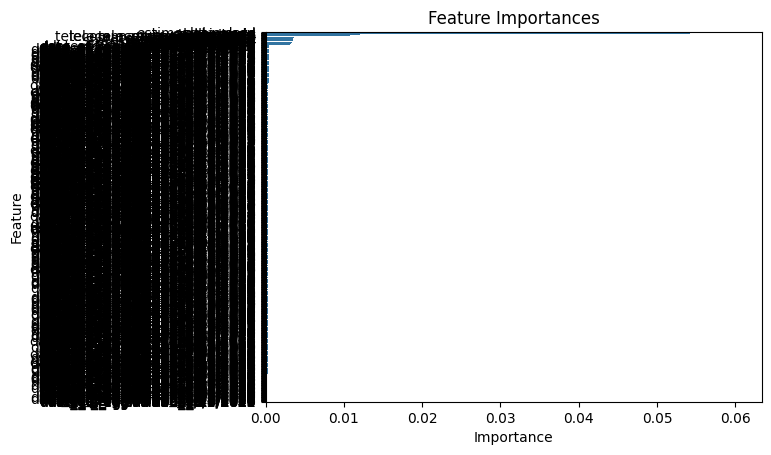

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display Feature Importances
print("\nFeature Importances:\n", importances_df)

# Visualization
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances')
plt.show()


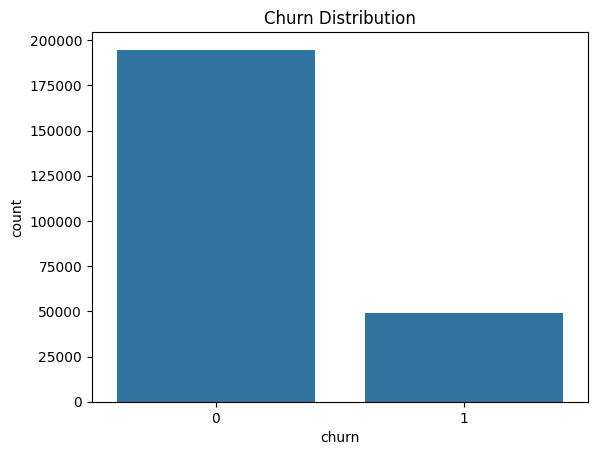

In [16]:
# Distribution of churn
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()
